# Equation Solving

$$ F(x) = 0 $$
Set $ G(x) = F(x)$ and $F(x)$ has parameters $\{a,b,c\}$, we can get data set $G(x)$ given $x$. Then we train a network with features $\{a,b,c,G(x)\}$ and label $x$. The solution for equation will be the predicted result given $\{a,b,c,0\}$

# Simple Equations

## 1. Linear Equation
$$ b x + c =0$$

In [87]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt

model = Sequential()
model.add(Dense(200, input_dim=3, init='uniform',activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error',optimizer='rmsprop',metrics=['accuracy'])

x_train = 100*(2*np.random.random((8000,3))-1)
y_train = x_train[:,2].copy()
d =  y_train*x_train[:,0] + x_train[:,1]
x_train[:,2] = d

hist = model.fit(x_train,y_train, nb_epoch=100, batch_size=20,verbose=0,shuffle=True, validation_split=0.1)

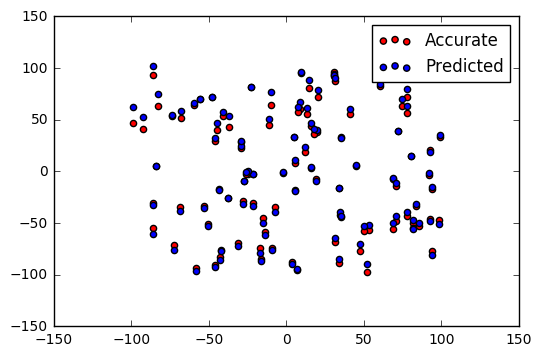

In [88]:
x_val = 100*(2*np.random.random((100,3))-1)
y_val = x_val[:,2].copy()
d = y_val*x_val[:,0] + x_val[:,1]
x_val[:,2] = d

out = model.predict(x_val)

plt.scatter(x_val[:,0], y_val,c='r',label='Accurate')
plt.scatter(x_val[:,0],out,label='Predicted')
plt.legend(loc=1)
plt.show()  

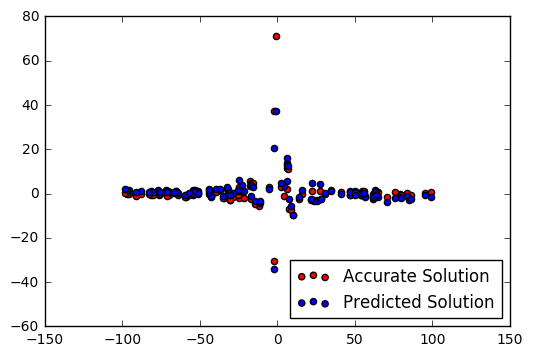

In [118]:
x_val = 100*(2*np.random.random((100,3))-1)
b = x_val[:,0]
c = x_val[:,1]
y_val = -c/b
x_val[:,2] = np.zeros(100)

out = model.predict(x_val)

plt.scatter(x_val[:,0], y_val,c='r',label='Accurate Solution')
plt.scatter(x_val[:,0],out,label='Predicted Solution')
plt.legend(loc=4)

plt.show()  

## 2. Quadratic equation
$$ a x^2 + b x + c =0$$